# **Lab Programming Machine Learning**



## Exercise Sheet 2

### Exercise 1: Exploratory Analysis on Real-World Data using Pandas and Matplotlib

#### Part A: Interesting stats

In [1]:
#Uploading the file from Google drive
store_id = '1taD4T_wYGhR_Q4pwkzC-DQxrMQxUjBlF'
train_id = '1g0K5Lf3wXOh1gE_0C7XGKh8Kn-XYaG-T'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={store_id}' -O store.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={train_id}' -O train.csv

#Uploading the file from Google drive
# from google.colab import files
# uploaded = files.upload()

--2022-03-24 19:35:50--  https://docs.google.com/uc?export=download&id=1taD4T_wYGhR_Q4pwkzC-DQxrMQxUjBlF
Resolving docs.google.com (docs.google.com)... 173.194.216.138, 173.194.216.101, 173.194.216.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0nuv9f915vaap5ba922ffju3qm6i10pa/1648150500000/14760575472933726065/*/1taD4T_wYGhR_Q4pwkzC-DQxrMQxUjBlF?e=download [following]
--2022-03-24 19:35:50--  https://doc-10-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0nuv9f915vaap5ba922ffju3qm6i10pa/1648150500000/14760575472933726065/*/1taD4T_wYGhR_Q4pwkzC-DQxrMQxUjBlF?e=download
Resolving doc-10-ao-docs.googleusercontent.com (doc-10-ao-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-10-ao-docs.googleusercontent.com (doc-10-ao-docs

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

In [3]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train.head() #For info purpose

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train.info() #For info purpose

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store.head() #For info purpose

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store.info() #For info purpose

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### Store with the maximum sale recorded

In [5]:
maxsales_i = train['Sales'].idxmax() #index of the row with the max amount in the column Sales
train.iloc[maxsales_i].loc[['Store','Date','Sales']]

Store           909
Date     2015-06-22
Sales         41551
Name: 44393, dtype: object

##### Store(s) that has/ve the least possible and maximum possible competition distance(s).

In [ ]:
print('Store/s with maximum possible competition distance:',store.loc[store['CompetitionDistance']==store['CompetitionDistance'].max(),'Store'],sep='\n')
print('Store/s with least possible competition distance:',store.loc[store['CompetitionDistance']==store['CompetitionDistance'].min(),'Store'],sep='\n')

Store/s with maximum possible competition distance:
452    453
Name: Store, dtype: int64
Store/s with least possible competition distance:
515    516
Name: Store, dtype: int64


##### Maximum timeline a store has ran a "Promo"

*Since the task was not clear enough I considered the running of a promo as the period of time a store has had activated a promo2 

In [6]:
stores_w_promo = store[['Store','Promo2SinceWeek','Promo2SinceYear']].dropna()
stores_w_promo_miny = stores_w_promo.loc[stores_w_promo['Promo2SinceYear']==stores_w_promo['Promo2SinceYear'].min()]
stores_w_promo_miny_minw = stores_w_promo_miny.loc[stores_w_promo_miny['Promo2SinceWeek']==stores_w_promo_miny['Promo2SinceWeek'].min()]
print('List of stores with the earliest Promo2 activation date:',stores_w_promo_miny_minw,sep='\n')

List of stores with the earliest Promo2 activation date:
     Store  Promo2SinceWeek  Promo2SinceYear
157    158             31.0           2009.0
276    277             31.0           2009.0
369    370             31.0           2009.0
611    612             31.0           2009.0
636    637             31.0           2009.0
807    808             31.0           2009.0
959    960             31.0           2009.0


In [7]:
#Here we get the difference in days between the last day in the train dataset and the earliest date a store has had a Promo2 activated
Promo2SinceYear = stores_w_promo_miny_minw['Promo2SinceYear'].astype(int).astype(str)
Promo2SinceWeek = stores_w_promo_miny_minw['Promo2SinceWeek'].astype(int).astype(str)
stores_w_promo_miny_minw['year-week'] = Promo2SinceYear.str.cat(Promo2SinceWeek,sep ="-") + '-1' #We assume Monday is the first day of the week
stores_w_promo_miny_minw['year-week'] = pd.to_datetime(stores_w_promo_miny_minw['year-week'],format='%Y-%W-%w')
train_last_day = pd.to_datetime(train.Date).max() #Last day in the train dataset
stores_w_promo_miny_minw['timeline'] = train_last_day - stores_w_promo_miny_minw['year-week']
print(stores_w_promo_miny_minw)


     Store  Promo2SinceWeek  Promo2SinceYear  year-week  timeline
157    158             31.0           2009.0 2009-08-03 2188 days
276    277             31.0           2009.0 2009-08-03 2188 days
369    370             31.0           2009.0 2009-08-03 2188 days
611    612             31.0           2009.0 2009-08-03 2188 days
636    637             31.0           2009.0 2009-08-03 2188 days
807    808             31.0           2009.0 2009-08-03 2188 days
959    960             31.0           2009.0 2009-08-03 2188 days


##### Difference in the mean of sales (across all stores) when offering a Promo and not

In [8]:
mu_p = train.loc[train['Promo']==1,'Sales'].mean()
mu_wp =train.loc[train['Promo']==0,'Sales'].mean()
print('Difference in the mean of sales is:',mu_p-mu_wp)

Difference in the mean of sales is: 3585.1012408091174


##### Anomalies in the data

In [9]:
closed_stores_wsales = train.loc[(train.Open==0) & (train.Sales>0),['Store','Open','Sales']]
print('List of closed stores with sales',closed_stores_wsales,sep='\n')
open_stores_wnsales = train.loc[(train.Open==1) & (train.Sales==0),['Store','Open','Sales']]
print('List of open stores with no sales',open_stores_wnsales,sep='\n')

List of closed stores with sales
Empty DataFrame
Columns: [Store, Open, Sales]
Index: []
List of open stores with no sales
        Store  Open  Sales
86825     971     1      0
142278    674     1      0
196938    699     1      0
322053    708     1      0
330176    357     1      0
340348    227     1      0
340860    835     1      0
341795    835     1      0
346232    548     1      0
346734     28     1      0
347669     28     1      0
348604     28     1      0
386065    102     1      0
386173    238     1      0
386227    303     1      0
386304    387     1      0
387652    882     1      0
387656    887     1      0
397285    102     1      0
406384    925     1      0
407532     57     1      0
437311   1017     1      0
438426   1017     1      0
477534   1100     1      0
478649   1100     1      0
506085    661     1      0
512964    850     1      0
525365    986     1      0
531396    327     1      0
561199     25     1      0
562314     25     1      0
582982    623

##### Store type with more Sales

In [10]:
merge = train[['Store','Sales']].merge(store[['Store','StoreType']],on='Store')
print('The store type with more sales is:',pd.pivot_table(merge,index='StoreType',values='Sales',aggfunc=np.sum).nlargest(1,'Sales'),sep='\n')

The store type with more sales is:
                Sales
StoreType            
a          3165334859


####Part B: Plotting

##### Mean of sales by months

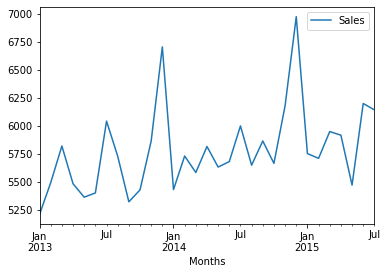

In [11]:
train.Date = pd.to_datetime(train.Date)
train[['Sales','Date']].groupby(pd.Grouper(key='Date', freq='M')).mean().plot(xlabel='Months')

##### Mean of sales by day

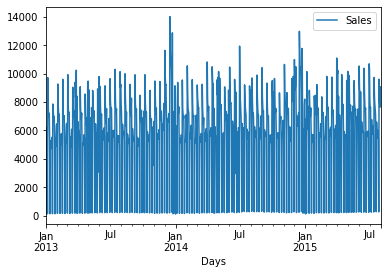

In [12]:
train[['Sales','Date']].groupby(pd.Grouper(key='Date', freq='D')).mean().plot(xlabel='Days')

##### Cumulative sales for the first store id and for the first year

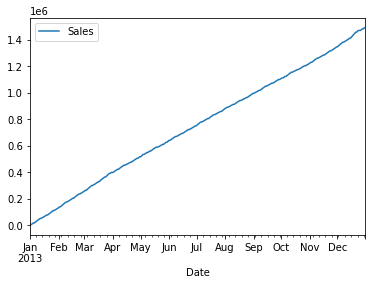

In [ ]:
# train.Date = pd.to_datetime(train.Date)
sales_store1_year1 = train.loc[(train.Store==1) & (pd.DatetimeIndex(train.Date).year == pd.DatetimeIndex(train.Date).year.min()),['Sales','Date']]
sales_store1_year1.sort_values(by='Date').set_index('Date').cumsum().plot()

##### Customers(x-axis) vs. sales(y-axis)

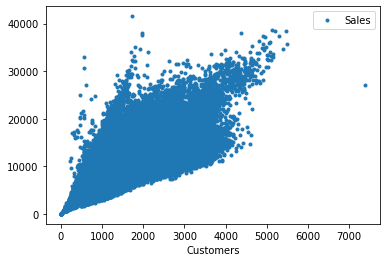

In [ ]:
train.plot(x='Customers',y='Sales',style='.')

##### Competitiondistance(x-axis) vs. sales(y-axis)

<Figure size 720x432 with 0 Axes>

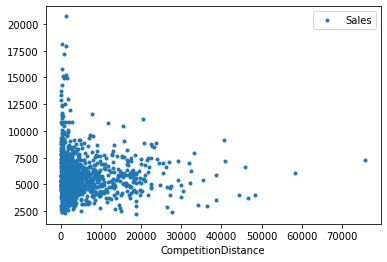

In [ ]:
merge = train[['Store','Sales']].merge(store[['Store','CompetitionDistance']],on='Store')
store_sales_distance = merge.groupby('Store').agg({'Sales':'mean','CompetitionDistance':'mean'})
store_sales_distance.plot(x='CompetitionDistance',y='Sales',style='.')

##### Pearson correlations between all features

In [ ]:
merge = train.merge(store,on='Store')
merge.corr(method='pearson') #Person's correlation is sensitive only to linear relation ship between variables

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


##### Boxplots of Sales of 10 first stores

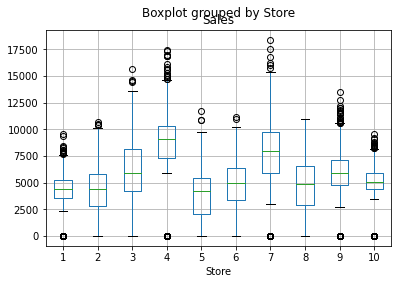

In [ ]:
ten_stores = train.loc[train.Store < 11,['Store','Sales']]
ten_stores.boxplot(column='Sales',by='Store')

From the above plot, which store has the highest median sales? Answer = **Store number 4**

### Exercise 2: Linear Regression

#### Part A: Implementing Gaussian Elimination

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Multiple Linear Regression (MLR)
\begin{align}
y_i=\beta_0 + \sum_{j=1}^M \beta_j x_{ij} + \epsilon_i
\end{align}
Where M is the number of independent variables

With M=10
\begin{align}
y_i=\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{10} x_{i10} + \epsilon_i
\end{align}
As a matrix with N=100 samples
\begin{gather}
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{100}
\end{pmatrix}
=\begin{pmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,10} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,10} \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{100,1} & x_{100,2} & \cdots & x_{100,10}
\end{pmatrix}
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_{10}
\end{pmatrix}
+\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_{100}
\end{pmatrix}
\end{gather}
Matritial representation
\begin{align}
Y=X\beta + \epsilon
\end{align}
\begin{align}
\hat Y = X \beta
\end{align}
\begin{align}
\underbrace{X^TX}_{A} \beta = \underbrace{X^T Y}_{b}
\end{align}

Generating a input variables X and Y

In [ ]:
I = np.random.normal(loc=2, scale=0.01, size=(100,10))
X = np.concatenate((np.ones((100,1)),I),axis=1)
Y = np.random.uniform(size=(100,1))

In [ ]:
A = np.matmul(X.transpose(),X)
b = np.matmul(X.transpose(),Y)

Gauss elimination algorithm

In [ ]:
#Using method developed by myself in lab sheet1
def invt(mtx):
  n = mtx.shape[0]
  mtx_I = np.identity(n,dtype=float)
  for d in range(n):
    #row/dig
    dig = mtx[d,d]
    for j in range(n):
      mtx[d,j] = mtx[d,j]/dig
      mtx_I[d,j] = mtx_I[d,j]/dig
    for i in range(n):
      if i != d:
        #row-mul*row(dig)
        mult = mtx[i,d]
        for j in range(n):
          mtx[i,j] = mtx[i,j]-mult*mtx[d,j]
          mtx_I[i,j]= mtx_I[i,j]-mult*mtx_I[d,j]
  return mtx_I

β = np.matmul(invt(A.copy()),b)
print(β)

[[-8.55128386]
 [ 2.78125642]
 [ 2.93085587]
 [-2.98722721]
 [-1.04831541]
 [ 1.40197565]
 [-1.84008775]
 [ 6.69169001]
 [ 1.24800668]
 [-2.4868151 ]
 [-2.16879971]]


Calculus of predicted Yp

In [ ]:
Yp = np.matmul(X,β)
print(Yp.flatten())

[0.46162782 0.46515638 0.37640017 0.58090649 0.51907559 0.51374872
 0.37111638 0.47008103 0.49356979 0.51157911 0.40250335 0.43953231
 0.54810642 0.59052733 0.55049876 0.68629743 0.6176703  0.31470255
 0.39315386 0.45394271 0.64895589 0.5849012  0.39895508 0.4693631
 0.59930472 0.45312404 0.54539055 0.35290188 0.66088799 0.47183049
 0.50793919 0.43758498 0.59631927 0.44508733 0.52210059 0.46073378
 0.46309725 0.36052174 0.48612981 0.62875764 0.67943436 0.42041627
 0.51713697 0.4253306  0.48067155 0.52040981 0.59972916 0.61729818
 0.37741789 0.45079348 0.32727293 0.46772683 0.58670733 0.5869598
 0.42775387 0.42561307 0.5031202  0.65278289 0.46661124 0.58540393
 0.40627952 0.59233048 0.45754106 0.49396281 0.49846207 0.40635766
 0.6609925  0.54096557 0.52089246 0.34119018 0.49343673 0.50422406
 0.55883378 0.50821531 0.47510258 0.58579764 0.48668129 0.63153382
 0.57234758 0.56002954 0.5542137  0.47337154 0.59732179 0.496284
 0.62317415 0.50803688 0.45310115 0.53873887 0.62671658 0.61253688

Plot Y and Yp

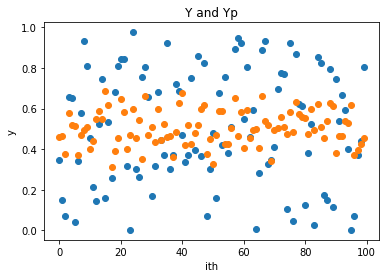

In [ ]:
plt.scatter(range(100),Y)
plt.title("Y and Yp")
plt.xlabel("ith")
plt.ylabel("y")
plt.scatter(range(100),Yp)

Using numpy.linalg.lstsq

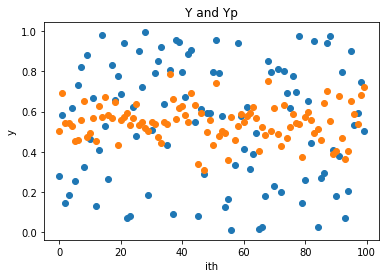

In [ ]:
β_nll = np.linalg.lstsq(A,b,rcond=None)[0]
Yp_nll = np.matmul(X,β_nll)
plt.scatter(range(100),Y)
plt.title("Y and Yp")
plt.xlabel("ith")
plt.ylabel("y")
plt.scatter(range(100),Yp_nll)

#### Part B: Multiple Linear (Auto)Regression

Multivariate Multiple Regression
\begin{gather}
\begin{pmatrix}
y_{1,1} & y_{1,2} & \cdots & y_{1,42}\\
y_{2,1} & y_{2,2} & \cdots & y_{2,42} \\
\vdots & \vdots & \cdots & \vdots \\
y_{800,1} & y_{800,2} & \cdots & y_{800,42}
\end{pmatrix}
=\begin{pmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,900} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,900} \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{800,1} & x_{800,2} & \cdots & x_{800,900}
\end{pmatrix}
\begin{pmatrix}
\beta_{0,1} & \beta_{0,2} & \cdots & \beta_{0,42}\\
\beta_{1,1} & \beta_{1,2} & \cdots & \beta_{1,42} \\
\vdots & \vdots & \cdots & \vdots \\
\beta_{900,1} & \beta_{900,2} & \cdots & \beta_{900,42}
\end{pmatrix}
+\boldsymbol{\epsilon}
\end{gather}

In [ ]:
#Removing stores with less than 942 records (days)
train_recordxstore = train[['Store','Date']].groupby('Store').count()
stores_942d = train_recordxstore.loc[train_recordxstore.Date == 942]
train_942d = train.join(stores_942d,on='Store',how='right',rsuffix='_')[['Store','Date','Sales']]
train_942d_arr = train_942d.pivot(index="Store", columns='Date', values='Sales').to_numpy(na_value=0)
#Slicing the matrix
X_train_ = train_942d_arr[:800,:900]
Y_train = train_942d_arr[:800,900:]
X_test_ = train_942d_arr[800:,:900]
Y_test = train_942d_arr[800:,900:]
#Adding the bias
X_train = np.concatenate((np.ones((X_train_.shape[0],1)),X_train_),axis=1)
X_test = np.concatenate((np.ones((X_test_.shape[0],1)),X_test_),axis=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(800, 901)
(800, 42)
(134, 901)
(134, 42)


Normal Equations
\begin{equation}
\hat\beta = {(\underbrace{X^TX}_{A})}^{-1} \underbrace{X^T Y}_{b}
\end{equation}

In [ ]:
A = np.matmul(X_train.transpose(),X_train)
b = np.matmul(X_train.transpose(),Y_train)
print(A.shape)
print(b.shape)

(901, 901)
(901, 42)


In [ ]:
from numpy.linalg import inv
beta = np.matmul(inv(A),b)
print(beta.shape)
print(beta)

(901, 42)
[[-8.48426945e+03 -6.73620736e+03 -9.98139144e+03 ... -1.41893365e+04
  -1.32238618e+04 -1.49939546e+04]
 [-3.24364375e+04 -3.68168750e+04 -3.82263750e+04 ... -4.68355938e+04
  -4.75254062e+04 -5.35603125e+04]
 [-8.85232630e+00 -1.03310117e+01 -9.84691092e+00 ... -1.11135304e+01
  -1.12099223e+01 -1.33828701e+01]
 ...
 [-2.40211411e-01 -4.08817868e-10  7.30315403e-02 ...  2.87205468e-01
   1.22761199e-01 -4.58099422e-01]
 [ 6.44862066e-02  6.81757228e-09 -2.37147845e-01 ...  7.60699505e-02
   6.75380908e-01  7.23832845e-02]
 [ 1.91323640e-01 -1.77533366e-09  2.90875787e-01 ... -4.30810309e-01
   1.77651176e-01  5.39095737e-01]]


In [ ]:
#Proof of inversion of A
D = np.diagonal(A @ inv(A))
print(D.astype(int))
#*Since D is not an array of ones, the inversion is performed properly. The matrix A could be ill-conditioned.

Predicted ouputs
\begin{align}
\hat Y = X\beta
\end{align}

In [ ]:
Y_train_pred = np.matmul(X_train,beta)
Y_test_pred = np.matmul(X_test,beta)
print(Y_train_pred.shape)
print(Y_test_pred.shape)


(800, 42)
(134, 42)


RMSE and MAE by aggregating the errors for all 42 days.
\begin{equation}
RMSE = \sqrt{\frac{\sum_{i=1}^N (y_i-\hat y_i)^2}{N}}
\end{equation}
\begin{equation}
MAE = \frac{\sum_{i=1}^N |y_i-\hat y_i|}{N}
\end{equation}

In [ ]:
#Function to calculate RMSE of a matrix
def RMSE(Y_true,Y_pred):
  N = Y_true.shape[0]
  L = Y_true.shape[1]
  RMSE = np.empty(L)
  for j in range(L):
    sq = 0
    for i in range(N):
      sq = sq + (Y_true[i,j]-Y_pred[i,j])**2
    RMSE[j] = (sq/N)**(1/2)
  return RMSE

In [ ]:
RMSE_train = RMSE(Y_train_pred,Y_train)
print('Daily RMSE of training output:',RMSE_train,sep='\n')
print('Overall average RMSE of training output:',RMSE_train.mean(),sep='\n')

In [ ]:
RMSE_test = RMSE(Y_test_pred,Y_test)
print('Daily RMSE of testing output:',RMSE_test,sep='\n')
print('Overall average RMSE of testing output:',RMSE_test.mean(),sep='\n')

Daily RMSE of testing output:
[1.36738075e+08 2.05766341e+08 1.66786221e+08 1.55825659e+08
 1.53652343e+08 1.53739981e+08 1.66807778e+08 1.43234896e+08
 2.11769425e+08 2.13563666e+08 2.18184648e+08 2.05128803e+08
 2.01384213e+08 2.04951589e+08 1.46689672e+08 2.15408158e+08
 1.79344982e+08 1.61592178e+08 1.68199724e+08 1.65589194e+08
 1.72159436e+08 1.45420238e+08 2.21422796e+08 2.06705454e+08
 1.96721955e+08 1.91227295e+08 1.88419262e+08 1.92722125e+08
 1.52420996e+08 2.29067571e+08 1.71846269e+08 1.59069623e+08
 1.57640496e+08 1.60282735e+08 1.66342673e+08 1.38323736e+08
 2.21759717e+08 2.04545237e+08 1.89263908e+08 1.83921821e+08
 1.89463194e+08 2.15437960e+08]
Overall average RMSE of testing output:
181631953.35621664


In [ ]:
#Function to calculate MAE of a matrix
def MAE(Y_true,Y_pred):
  N = Y_true.shape[0]
  L = Y_true.shape[1]
  MAE = np.empty(L)
  for j in range(L):
    ab = 0
    for i in range(N):
      ab = ab + abs(Y_true[i,j]-Y_pred[i,j])
    MAE[j] = ab/N
  return MAE

In [ ]:
MAE_train = MAE(Y_train_pred,Y_train)
print('Daily MAE of training output:',MAE_train,sep='\n')
print('Overall average MAE of training output:',MAE_train.mean(),sep='\n')

In [ ]:
MAE_test = MAE(Y_test_pred,Y_test)
print('Daily MAE of testing output:',MAE_test,sep='\n')
print('Overall average MAE of testing output:',MAE_test.mean(),sep='\n')

Daily MAE of testing output:
[19409144.17998911 30323962.93307509 23832228.46427133 22214978.27118934
 21901254.82690484 21870143.44241852 23767574.63747559 20395019.14746459
 31243854.84612876 30087508.65338796 30761324.69420186 29185173.89539505
 28736416.32504795 29288786.39782197 21066071.68978449 31811895.67791464
 25700318.22032491 23141735.77234106 24052778.98401928 23644955.01391876
 24587992.78804294 20766346.23815168 32712601.48102493 29320305.17110473
 27930452.88147526 27185846.26216351 26829873.44518572 27558363.60245719
 21881492.61209679 33956544.19548743 24670956.92152048 22815437.75152314
 22641893.46642383 23064134.86305602 23851037.46279978 19909219.08068212
 32819459.89812243 29176169.92847637 27011934.3004659  26317266.93454431
 27043348.39878079 30683202.14779146]
Overall average MAE of testing output:
26075452.52153457


Repeating last sale value per store

In [ ]:
Y_test_pred_lvalue = np.tile(X_test_[:,-1],(42,1)).transpose()
print(Y_test_pred_lvalue.shape)
print('Overall average RMSE of testing output using last sale value:',RMSE(Y_test_pred_lvalue,Y_test).mean(),sep='\n')
print('Overall average MAE of testing output using last sale value:',MAE(Y_test_pred_lvalue,Y_test).mean(),sep='\n')

(134, 42)
Overall average RMSE of testing output using last sale value:
2827.743356034661
Overall average MAE of testing output using last sale value:
2518.8113006396584


Repeating mean sale value per store

In [ ]:
Y_test_pred_mvalue = np.tile(np.mean(X_test_,axis=1),(42,1)).transpose()
print(Y_test_pred_mvalue.shape)
print('Overall average RMSE of testing output using mean sale value:',RMSE(Y_test_pred_mvalue,Y_test).mean(),sep='\n')
print('Overall average MAE of testing output using mean sale value:',MAE(Y_test_pred_mvalue,Y_test).mean(),sep='\n')

(134, 42)
Overall average RMSE of testing output using mean sale value:
2512.8475254732907
Overall average MAE of testing output using mean sale value:
2221.3705405512123


Repeating mean value per store per weekday

In [ ]:
Yweek = np.empty((0,134))

for d in range(7):
  Yday = np.mean(X_test_[:,d::7],axis=1)
  Yweek = np.append(Yweek, np.array([Yday]), axis=0)
print(Yweek.shape)
Y_test_pred_dxwvalue = np.tile(Yweek,(6,1)).transpose()
Y_test_pred_dxwvalue = np.roll(Y_test_pred_dxwvalue,-4,axis=1) #Here I roll the matrix so that it starts the same day of the week as Ytest
print(Y_test_pred_dxwvalue.shape)
print('Overall average RMSE of testing output using mean sale value per weekday:',RMSE(Y_test_pred_dxwvalue,Y_test).mean(),sep='\n')
print('Overall average MAE of testing output using mean sale value per weekday:',MAE(Y_test_pred_dxwvalue,Y_test).mean(),sep='\n')

(7, 134)
(134, 42)
Overall average RMSE of testing output using mean sale value per weekday:
1395.1131736923976
Overall average MAE of testing output using mean sale value per weekday:
1123.1476701443983


Reason why not Linear Regression is a good choice for this task.

A linear regression model is not a good choice for this task because a times series forecasting problem like this does not fit well its assumptions. Below we can find each of the assumptions of the model and why or why not times series forecasting fit them well:
*   Linearity: the relationship between x and y is linear. The problem does not fit this assumption well because there are other factors that can affect the level of sales rather than the specific day in consideration and are not taken into account. For example, business cycles, new regulations, etc.
*   Independence: observations y should be independent of each other. The problem does not fit this assumption well because the sales of a day could affect the sales of the next one. For example, a day without promo after a day with promo, a weekend day after a weekday, etc.
*   Distribution: for each independent variable x, the dependent variable y is identically distributed. Moreover, it should be normally distributed. The problem does not fit this assumption well because there are short-term factors that can affect the sales and therefore outliers can appear easily. For example, factors such as the weather, movements of the competition, etc.

